## Gerekli k√ºt√ºphaneleri y√ºkleyin

*MERT TOSUN 210601027 Bƒ∞LGƒ∞SAYAR M√úHENDƒ∞SLƒ∞ƒûƒ∞ BYM446 VERƒ∞ MADENCƒ∞Lƒ∞ƒûƒ∞NE Gƒ∞Rƒ∞≈û*

In [ ]:
# ===============================================================

import pandas as pd #veri y√ºkleme ve i≈üleme
import numpy as np  #sayƒ±sal i≈ülemler
import matplotlib.pyplot as plt #g√∂rselle≈ütirme
import seaborn as sns #g√∂rselle≈ütirme

from sklearn.preprocessing import MinMaxScaler #normalizasyon i√ßin
from sklearn.decomposition import PCA  # boyut indirgeme
from scipy.spatial import distance     #√ñklidyen ve Manhattan mesafesi hesaplamak i√ßin


In [ ]:
# ===============================================================

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

df = pd.read_csv(
    url,
    header=None,
    names=[
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ],
    na_values=" ?",
    skipinitialspace=True
)
df.head()


age         workclass  fnlwgt  ... hours-per-week  native-country income
0   39         State-gov   77516  ...             40   United-States  <=50K
1   50  Self-emp-not-inc   83311  ...             13   United-States  <=50K
2   38           Private  215646  ...             40   United-States  <=50K
3   53           Private  234721  ...             40   United-States  <=50K
4   28           Private  338409  ...             40            Cuba  <=50K

[5 rows x 15 columns]

Bu kod, "Adult Income Dataset" veri setini internetten indirerek bir Pandas DataFrame'ine y√ºkler. Ayrƒ±ca veri setinde olmayan s√ºtun adlarƒ± tanƒ±mlanƒ±r, " ?" ile g√∂sterilen eksik veriler NaN olarak i≈üaretlenir ve bo≈üluklar temizlenir.
Son olarak, ilk 5 satƒ±r g√∂r√ºnt√ºlenerek veri yapƒ±sƒ± incelenir.

names=[...] ≈üunu saƒülar:
S√ºtunlara anlamlƒ± isimler veririz. B√∂ylece ileride ≈üu i≈ülemleri kolayca yaparƒ±z:

* df['age'].mean() gibi istatistik hesaplama,
* df['education'].value_counts() gibi analizler,
* Grafik √ßizerken s√ºtun isimleriyle referans verme.



In [ ]:
# ===============================================================

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

###  ƒ∞statistiksel Veri T√ºrleri A√ßƒ±klamasƒ±
- **Nominal:** Sadece etiket ‚Äì sƒ±ralama yok (√∂rnek: cinsiyet, meslek)
- **Ordinal:** Sƒ±ralama var ama aralƒ±k bilinmez (√∂rnek: eƒüitim seviyesi)
- **Interval:** Aralƒ±k anlamlƒ± ama 0 noktasƒ± keyfi (√∂rnek: sƒ±caklƒ±k ¬∞C)
- **Ratio:** Ger√ßek sƒ±fƒ±r ve oran alƒ±nabilir (√∂rnek: ya≈ü, gelir)

  √ñznitelik T√ºrleri Tablosu

| √ñznitelik         | Veri T√ºr√º (Tip) | Gerek√ße |
|-------------------|-----------------|---------|
| age               | Ratio           | Ya≈ü sayƒ±sal bir veridir, sƒ±fƒ±r noktasƒ± anlamlƒ±dƒ±r, oran alƒ±nabilir (√∂rneƒüin 40 ya≈ü, 20 ya≈üƒ±n 2 katƒ±dƒ±r). |
| workclass         | Nominal         | ƒ∞≈ü sƒ±nƒ±fƒ± sadece kategorik etiketlerden olu≈üur; sƒ±ralama veya hesaplama yapƒ±lamaz. |
| fnlwgt            | Ratio           | √ñrnekleme aƒüƒ±rlƒ±ƒüƒ±dƒ±r, sayƒ±saldƒ±r ve sƒ±fƒ±r noktasƒ± anlamlƒ±dƒ±r; oran alƒ±nabilir. |
| education         | Ordinal         | Eƒüitim seviyeleri belli bir sƒ±ralamaya sahiptir (√∂rneƒüin HS < Bachelor < Masters). |
| education-num     | Ordinal         | Eƒüitim seviyesinin sayƒ±sal kar≈üƒ±lƒ±ƒüƒ±dƒ±r; sƒ±ralama vardƒ±r ama deƒüerler arasƒ± fark sabit deƒüildir. |
| marital-status    | Nominal         | Kategorik veridir (evli, bekar, bo≈üanmƒ±≈ü vb.), sƒ±ralama i√ßermez. |
| occupation        | Nominal         | Meslek t√ºrleri etiket olarak yazƒ±lƒ±r, sƒ±ralama veya hesaplama yapƒ±lamaz. |
| relationship      | Nominal         | Aile i√ßindeki konum bilgisidir, sƒ±ralama i√ßermez. |
| race              | Nominal         | Irk bilgisi sadece etiketlerden olu≈üur (White, Black, Asian-Pac-Islander vb.). |
| sex               | Nominal         | Cinsiyet bilgisi (Male, Female), sƒ±ralama i√ßermez. |
| capital-gain      | Ratio           | Sayƒ±sal verilerdir; 0 anlamlƒ±dƒ±r ve oran alƒ±nabilir (√∂rneƒüin 10000 kazan√ß, 5000‚Äôin 2 katƒ±). |
| capital-loss      | Ratio           | Sayƒ±sal verilerdir, kazan√ßtaki gibi oranlƒ± ve sƒ±fƒ±r anlamlƒ±dƒ±r. |
| hours-per-week    | Ratio           | √áalƒ±≈üƒ±lan saatler sayƒ±saldƒ±r, sƒ±fƒ±r noktasƒ± anlamlƒ±dƒ±r ve oran alƒ±nabilir. |
| native-country    | Nominal         | √úlke isimleri yalnƒ±zca kategorik tanƒ±mlardƒ±r, sƒ±ralanamaz. |
| income            | Ordinal         | ƒ∞kili sƒ±nƒ±f olmasƒ±na raƒümen sƒ±ralama anlamƒ± vardƒ±r (<=50K < >50K). |


In [ ]:
# ===============================================================

numerical_columns = [
    'age',              # Ya≈ü
    'fnlwgt',           # √ñrnekleme aƒüƒ±rlƒ±ƒüƒ±
    'education-num',    # Eƒüitim seviyesi (sayƒ±sal)
    'capital-gain',     # Sermaye kazancƒ±
    'capital-loss',     # Sermaye kaybƒ±
    'hours-per-week'    # Haftalƒ±k √ßalƒ±≈üma saati
]
for col in numerical_columns:
    print(f"--- {col} ---")
    print(f"Ortalama (Mean): {df[col].mean():.2f}")
    print(f"Medyan (Median): {df[col].median():.2f}")
    print(f"Mod (Mode): {df[col].mode()[0]}")
    print(f"Minimum: {df[col].min()}")
    print(f"Maksimum: {df[col].max()}")
    print(f"Standart Sapma: {df[col].std():.2f}")
    print()


--- age ---
Ortalama (Mean): 38.58
Medyan (Median): 37.00
Mod (Mode): 36
Minimum: 17
Maksimum: 90
Standart Sapma: 13.64

--- fnlwgt ---
Ortalama (Mean): 189778.37
Medyan (Median): 178356.00
Mod (Mode): 123011
Minimum: 12285
Maksimum: 1484705
Standart Sapma: 105549.98

--- education-num ---
Ortalama (Mean): 10.08
Medyan (Median): 10.00
Mod (Mode): 9
Minimum: 1
Maksimum: 16
Standart Sapma: 2.57

--- capital-gain ---
Ortalama (Mean): 1077.65
Medyan (Median): 0.00
Mod (Mode): 0
Minimum: 0
Maksimum: 99999
Standart Sapma: 7385.29

--- capital-loss ---
Ortalama (Mean): 87.30
Medyan (Median): 0.00
Mod (Mode): 0
Minimum: 0
Maksimum: 4356
Standart Sapma: 402.96

--- hours-per-week ---
Ortalama (Mean): 40.44
Medyan (Median): 40.00
Mod (Mode): 40
Minimum: 1
Maksimum: 99
Standart Sapma: 12.35



- **age (ya≈ü)**: Ortalama ya≈ü yakla≈üƒ±k 38 civarƒ±ndadƒ±r. Ya≈ülar 17 ile 90 arasƒ±nda deƒüi≈ümektedir. Bu da veri setinin √ßoƒüunlukla 30-40 ya≈ü aralƒ±ƒüƒ±ndaki bireyleri i√ßerdiƒüini g√∂stermektedir.

- **fnlwgt (√∂rnekleme aƒüƒ±rlƒ±ƒüƒ±)**: Ortalama yakla≈üƒ±k 190.000 civarƒ±ndadƒ±r. Bu deƒüer, bireyin temsil ettiƒüi ki≈üi sayƒ±sƒ±nƒ± ifade eder. B√ºy√ºk farklƒ±lƒ±klar olduƒüu i√ßin aykƒ±rƒ± deƒüerler i√ßerebilir.

- **education-num (eƒüitim seviyesi sayƒ±sal)**: Ortalama eƒüitim seviyesi yakla≈üƒ±k 10‚Äôdur. Bu, bireylerin √ßoƒüunun lise sonrasƒ± kƒ±sa s√ºreli eƒüitim aldƒ±ƒüƒ±nƒ± g√∂stermektedir.

- **capital-gain (sermaye kazancƒ±)**: Ortalamasƒ± y√ºksek olsa da medyanƒ± 0‚Äôdƒ±r. √áoƒüu ki≈üi sermaye kazancƒ± elde etmemi≈ütir.

- **capital-loss (sermaye kaybƒ±)**: Tƒ±pkƒ± capital-gain gibi, medyanƒ± 0‚Äôdƒ±r. Az sayƒ±da ki≈üi bu t√ºr bir kayƒ±p ya≈üamƒ±≈ütƒ±r.

- **hours-per-week (haftalƒ±k √ßalƒ±≈üma saati)**: Ortalama 40 saattir. Bu da √ßoƒüu ki≈üinin tam zamanlƒ± √ßalƒ±≈ütƒ±ƒüƒ±nƒ± g√∂sterir. Ancak 1 saat ve 99 saat gibi u√ß deƒüerler vardƒ±r.


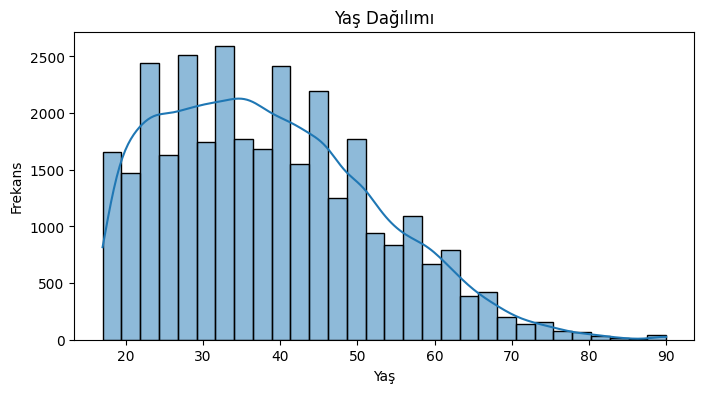

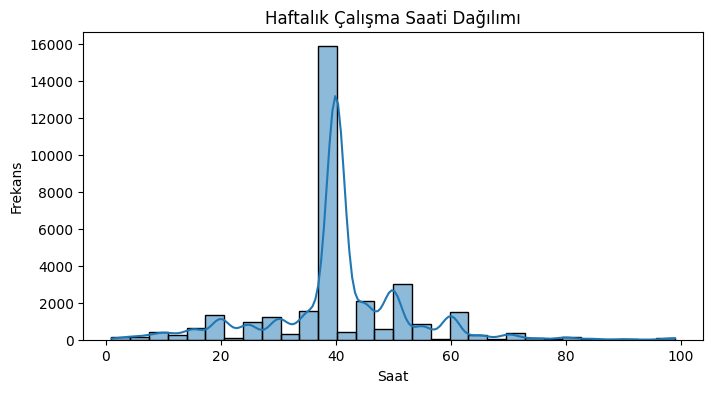

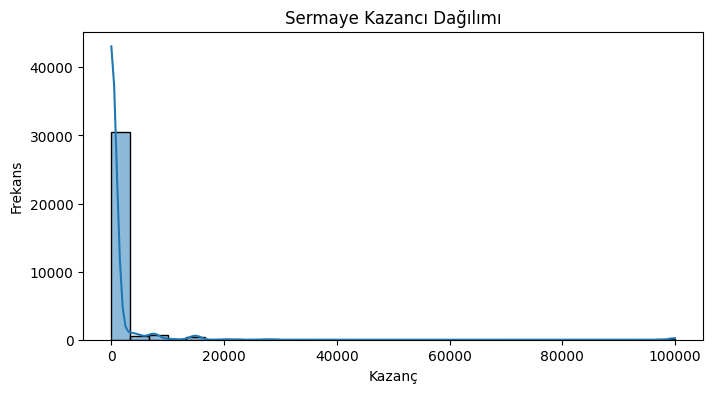

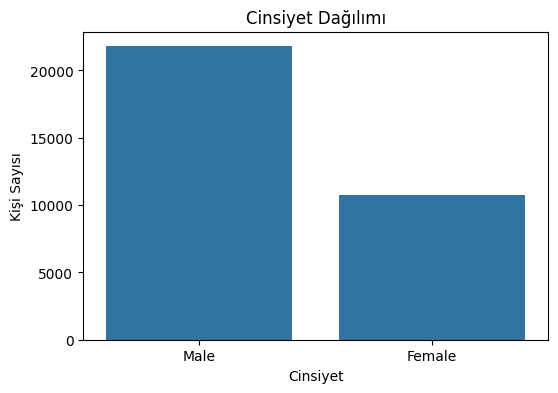

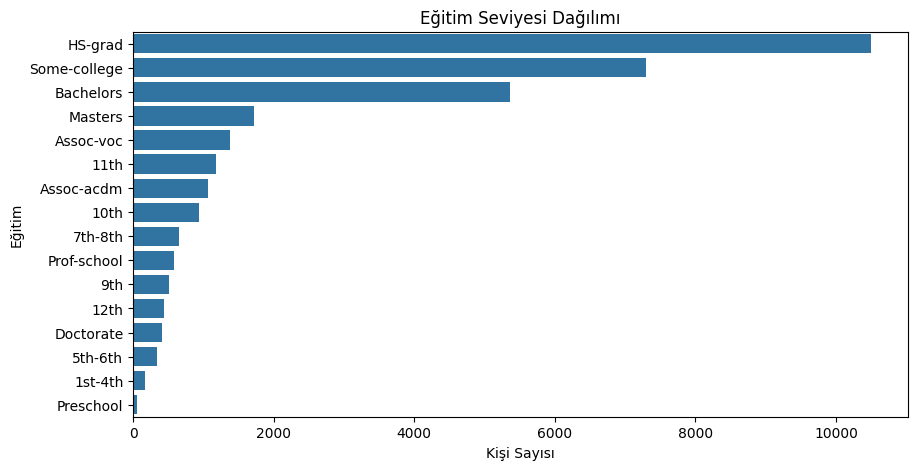

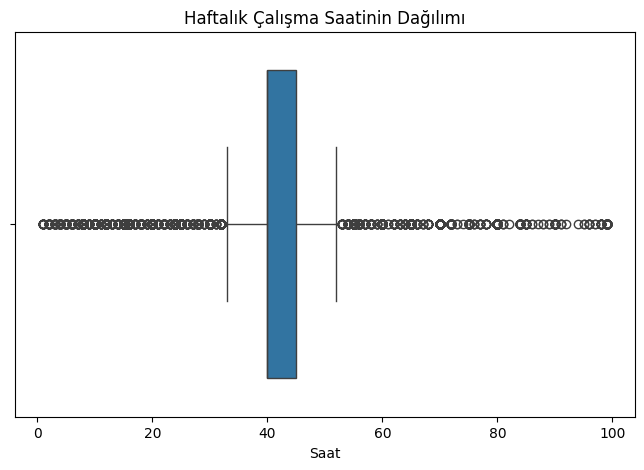

In [ ]:
# ===============================================================
# Histogram: Ya≈ü
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Ya≈ü Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Ya≈ü')
plt.ylabel('Frekans')
plt.show()

# Histogram: Haftalƒ±k √áalƒ±≈üma Saati
plt.figure(figsize=(8, 4))
sns.histplot(df['hours-per-week'], bins=30, kde=True)
plt.title('Haftalƒ±k √áalƒ±≈üma Saati Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Saat')
plt.ylabel('Frekans')
plt.show()

# Histogram: Sermaye Kazancƒ±
plt.figure(figsize=(8, 4))
sns.histplot(df['capital-gain'], bins=30, kde=True)
plt.title('Sermaye Kazancƒ± Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Kazan√ß')
plt.ylabel('Frekans')
plt.show()

# Cinsiyet
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Cinsiyet Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Cinsiyet')
plt.ylabel('Ki≈üi Sayƒ±sƒ±')
plt.show()

# Eƒüitim
plt.figure(figsize=(10, 5))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Eƒüitim Seviyesi Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Ki≈üi Sayƒ±sƒ±')
plt.ylabel('Eƒüitim')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='hours-per-week', data=df)
plt.title('Haftalƒ±k √áalƒ±≈üma Saatinin Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Saat')
plt.show()


### üìä TABLOLAR ve DEƒûERLENDƒ∞RME
---

#### 1. Ya≈ü Daƒüƒ±lƒ±mƒ± (Histogram)

- Ya≈ülar yakla≈üƒ±k **17 ila 90** arasƒ±nda daƒüƒ±lmƒ±≈ü.
- En yoƒüun ya≈ü aralƒ±ƒüƒ± **20‚Äì40 ya≈ü**.
- Grafik saƒüa √ßarpƒ±k deƒüildir, olduk√ßa **dengeli bir daƒüƒ±lƒ±m** g√∂sterir.
- √áalƒ±≈üan bireylerin b√ºy√ºk √ßoƒüunluƒüu gen√ß ve orta ya≈ülƒ± bireylerdir.

---

#### 2. Haftalƒ±k √áalƒ±≈üma Saati Daƒüƒ±lƒ±mƒ± (Histogram)

- En √ßok √ßalƒ±≈üan saat: **40 saat** (tam zamanlƒ±).
- 40 saat dƒ±≈üƒ±nda da √ßalƒ±≈üanlar var, ama √ßok sayƒ±da ki≈üi 40 saat √ßalƒ±≈üƒ±yor.
- Grafik olduk√ßa **dar ve sivri**; bu da √ßalƒ±≈üma saatinin genellikle sabit olduƒüunu g√∂steriyor.
- U√ß deƒüerler 1‚Äì99 saat arasƒ± daƒüƒ±lƒ±yor ama √ßok seyrek.

---

#### 3. Sermaye Kazancƒ± Daƒüƒ±lƒ±mƒ± (Histogram)

- Grafikte **√ßok fazla ki≈üi 0 kazan√ß** elde etmi≈ü.
- Yalnƒ±zca az sayƒ±da ki≈üi y√ºksek kazan√ß almƒ±≈ü.
- Bu nedenle grafik **saƒüa √ßarpƒ±k**; √ßoƒüunluk grafiƒüin sol tarafƒ±na yƒ±ƒüƒ±lmƒ±≈ü.
- Kazan√ßlarƒ±n e≈üit daƒüƒ±lmadƒ±ƒüƒ± ve √ßoƒüu bireyin bu t√ºr gelir elde etmediƒüi g√∂r√ºl√ºyor.

---

#### 4. Cinsiyet Daƒüƒ±lƒ±mƒ± (Barplot)

- Veri setindeki bireylerin √ßoƒüunluƒüu **erkek (male)**.
- Kadƒ±n bireyler, erkeklerin yakla≈üƒ±k yarƒ±sƒ± kadar temsil edilmi≈ü.
- Bu daƒüƒ±lƒ±m, i≈üg√ºc√º verilerinde erkeklerin daha baskƒ±n olduƒüunu g√∂sterebilir.

---

#### 5. Eƒüitim Seviyesi Daƒüƒ±lƒ±mƒ± (Barplot)

- En sƒ±k g√∂r√ºlen eƒüitim seviyesi: **HS-grad (lise mezunu)**.
- Onu sƒ±rasƒ±yla **Some-college** ve **Bachelors** (lisans mezunu) izliyor.
- D√º≈ü√ºk eƒüitim d√ºzeyleri (1st‚Äì4th gibi) ve √ßok y√ºksek d√ºzeyler (Doctorate) daha az temsil edilmi≈ü.
- Veri setindeki bireylerin √ßoƒüu **orta seviye eƒüitim d√ºzeyine** sahip.

---

#### 6. Haftalƒ±k √áalƒ±≈üma Saati Daƒüƒ±lƒ±mƒ± (Boxplot)

- Medyan: **40 saat**, yani √ßoƒüu ki≈üi tam zamanlƒ± √ßalƒ±≈üƒ±yor.
- 1‚Äì10 saat √ßalƒ±≈üan bireyler (yarƒ± zamanlƒ±), 60+ saat √ßalƒ±≈üanlar ise **aykƒ±rƒ± (u√ß) deƒüer** olarak g√∂r√ºlmekte.
- Boxplot saƒüa uzayan bir yapƒ± g√∂steriyor, bu da **bazƒ± ki≈üilerin a≈üƒ±rƒ± uzun saatler √ßalƒ±≈ütƒ±ƒüƒ±nƒ±** ortaya koyuyor.

---

### üìå Genel G√∂zlem:
Grafiklerdeki daƒüƒ±lƒ±mlar, veri setinde demografik √ße≈üitliliƒüi, eƒüitim d√ºzeylerini ve i≈ü ya≈üamƒ± yoƒüunluƒüunu g√∂stermektedir. √áoƒüu deƒüi≈üken i√ßin merkezde yoƒüunla≈üma varken, kazan√ß gibi bazƒ± deƒüi≈ükenlerde u√ß deƒüerler baskƒ±n g√∂r√ºn√ºyor.


In [ ]:
# ===============================================================

# Sayƒ±sal kolonlarƒ± belirle
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# ƒ∞ki satƒ±r se√ß (√∂rnek olarak 0. ve 1. satƒ±r)
sample1 = df.loc[0, numerical_columns]
sample2 = df.loc[1, numerical_columns]

print("Sample 1:\n", sample1)
print("---------------------")
print("Sample 2:\n", sample2)

euclidean_dist = distance.euclidean(sample1, sample2)
manhattan_dist = distance.cityblock(sample1, sample2)

print("---------------------------------------")
print(f"√ñklidyen Mesafe: {euclidean_dist:.2f}")
print("---------------------------------------")
print(f"Manhattan Mesafe: {manhattan_dist:.2f}")
print("---------------------------------------")
# Cinsiyet kolonuna bakalƒ±m (√∂rnek: 0. ve 1. satƒ±r)
cat_col = 'sex'
cat_val1 = df.loc[0, cat_col]
cat_val2 = df.loc[1, cat_col]

print(f"{cat_col} - Sample 1: {cat_val1}, Sample 2: {cat_val2}")

# Basit e≈üle≈üme katsayƒ±sƒ±
smc = int(cat_val1 == cat_val2)
print(f"Basit E≈üle≈üme Katsayƒ±sƒ±: {smc}")# Cinsiyet kolonuna bakalƒ±m (√∂rnek: 0. ve 1. satƒ±r)
cat_col = 'sex'
cat_val1 = df.loc[0, cat_col]
cat_val2 = df.loc[1, cat_col]

print("----------------------------")
print(f"{cat_col} - Sample 1: {cat_val1}, Sample 2: {cat_val2}")

# Basit e≈üle≈üme katsayƒ±sƒ±
smc = int(cat_val1 == cat_val2)
print(f"Basit E≈üle≈üme Katsayƒ±sƒ±: {smc}")

Sample 1:
 age                  39
fnlwgt            77516
education-num        13
capital-gain       2174
capital-loss          0
hours-per-week       40
Name: 0, dtype: object
---------------------
Sample 2:
 age                  50
fnlwgt            83311
education-num        13
capital-gain          0
capital-loss          0
hours-per-week       13
Name: 1, dtype: object
---------------------------------------
√ñklidyen Mesafe: 6189.44
---------------------------------------
Manhattan Mesafe: 8007.00
---------------------------------------
sex - Sample 1: Male, Sample 2: Male
Basit E≈üle≈üme Katsayƒ±sƒ±: 1
----------------------------
sex - Sample 1: Male, Sample 2: Male
Basit E≈üle≈üme Katsayƒ±sƒ±: 1


√ñklidyen Mesafe (Euclidean Distance)
üîπ Tanƒ±m:
ƒ∞ki nokta arasƒ±ndaki d√ºz √ßizgi (doƒürusal) uzaklƒ±ktƒ±r.
Lisede g√∂rd√ºƒü√ºm√ºz klasik mesafe form√ºl√ºd√ºr

Ne zaman kullanƒ±lƒ±r?
√ñzellikler s√ºrekli (sayƒ±sal) olduƒüunda
Ger√ßek fiziksel uzaklƒ±k gibi yorumlandƒ±ƒüƒ±nda
Uzaklƒ±k artƒ±rƒ±mƒ± kareli fark olduƒüu i√ßin b√ºy√ºk farklar daha fazla etkiler (√∂zellikle outlier'larda)

Manhattan Mesafesi (Cityblock / L1 Distance)
üîπ Tanƒ±m:
ƒ∞ki nokta arasƒ±ndaki farklarƒ±n mutlak deƒüerlerinin toplamƒ±dƒ±r.
Yani: "ka√ß birim adƒ±mla yan yana ve yukarƒ± a≈üaƒüƒ± giderek ula≈üƒ±rƒ±m" mantƒ±ƒüƒ±.

Ne zaman kullanƒ±lƒ±r?
√ñzellikler yine sayƒ±sal olabilir ama:
Daha basit ve daha dayanƒ±klƒ± hesap yapƒ±lƒ±r
Aykƒ±rƒ± deƒüerlerin etkisi daha az olur
Kentsel mesafe modellerinde √ßok tercih edilir (≈üehir bloklarƒ± mantƒ±ƒüƒ±)

### üî¢ Benzerlik ve Farklƒ±lƒ±k √ñl√ß√ºmleri ‚Äì Deƒüerlendirme

ƒ∞ki rastgele se√ßilen birey √ºzerinden yapƒ±lan kar≈üƒ±la≈ütƒ±rma ≈üu sonu√ßlarƒ± vermi≈ütir:

- **√ñklidyen Mesafe**: 6189.44  
ƒ∞ki birey arasƒ±ndaki sayƒ±sal √∂zelliklerde d√ºz √ßizgi uzaklƒ±ƒüƒ± olduk√ßa y√ºksektir. Bu fark √∂zellikle `fnlwgt`, `capital-gain` ve `hours-per-week` deƒüi≈ükenlerinden kaynaklanmaktadƒ±r.

- **Manhattan Mesafe**: 8007.00  
Toplam fark daha da b√ºy√ºkt√ºr. Bu metrik, bireylerin i≈ü g√ºc√ºndeki davranƒ±≈ülarƒ± a√ßƒ±sƒ±ndan olduk√ßa farklƒ±lƒ±k ta≈üƒ±dƒ±ƒüƒ±nƒ± g√∂sterir.

- **Cinsiyet i√ßin Basit E≈üle≈üme Katsayƒ±sƒ±**: 1  
ƒ∞ki bireyin cinsiyeti aynƒ±dƒ±r (ikisi de erkek), bu nedenle bu √∂zellikte tam benzerlik vardƒ±r.

Bu analiz, sayƒ±sal √∂zelliklerde y√ºksek farklƒ±lƒ±k olmasƒ±na raƒümen bazƒ± kategorik √∂zelliklerde benzerliƒüin m√ºmk√ºn olduƒüunu g√∂stermektedir.

Veri madenciliƒüinde (ve makine √∂ƒürenmesinde), √ßok sƒ±k ≈üu durumlar olur:

* ƒ∞ki m√º≈üteri birbirine benziyor mu?
* ƒ∞ki hastanƒ±n semptomlarƒ± ne kadar yakƒ±n?
* Bu ki≈üi daha √∂nceki √∂rneklerden hangisine daha yakƒ±n?

ƒ∞≈üte burada devreye mesafe √∂l√ß√ºleri girer:
√ñklidyen ve Manhattan, bu ‚Äúbenzerlik‚Äù √∂l√ß√ºm√ºn√ºn sayƒ±sal y√∂ntemleridir.


Her s√ºtundaki eksik deƒüer sayƒ±sƒ±:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Temizlenmi≈ü veri seti boyutu: (32561, 15)


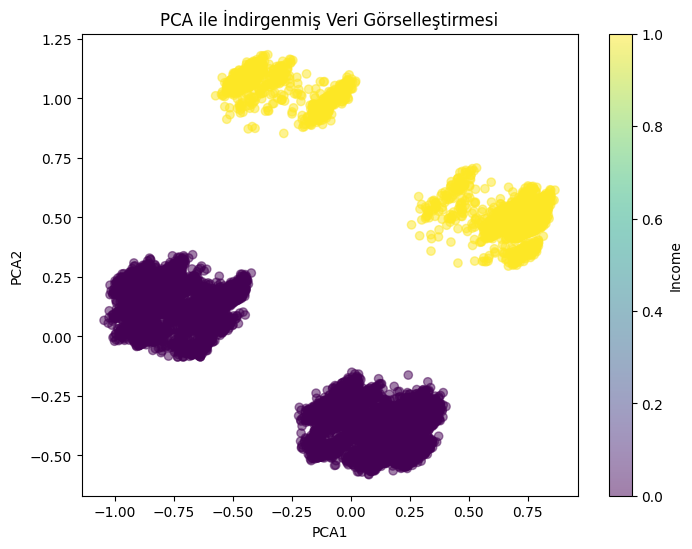

In [ ]:
# ===============================================================

# Eksik verileri kontrol et
print("Her s√ºtundaki eksik deƒüer sayƒ±sƒ±:")
print(df.isnull().sum())

# Eksik verileri i√ßeren satƒ±rlarƒ± sil
df_cleaned = df.dropna()

print(f"\nTemizlenmi≈ü veri seti boyutu: {df_cleaned.shape}")

# Kategorik s√ºtunlarƒ± se√ß
categorical_cols = df_cleaned.select_dtypes(include='object').columns

# Label encoding ile her kategoriyi sayƒ±ya d√∂n√º≈üt√ºr
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# PCA uygulayalƒ±m
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized)

# PCA sonu√ßlarƒ±nƒ± dataframe'e √ßevir
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Gelir (income) bilgisine g√∂re renklendirme i√ßin orijinal (etiketli) deƒüerleri al
df_pca['income'] = df_cleaned['income'].values

# G√∂rselle≈ütirme
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['income'], cmap='viridis', alpha=0.5)
plt.title('PCA ile ƒ∞ndirgenmi≈ü Veri G√∂rselle≈ütirmesi')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Income')
plt.show()



###  Eksik Veri Analizi

Veri setinde hi√ßbir s√ºtunda eksik veri bulunmamaktadƒ±r. Bu nedenle `dropna()` sonrasƒ± veri boyutunda herhangi bir azalma olmamƒ±≈ütƒ±r.  
Bu, veri setinin kaliteli ve temiz olduƒüunu g√∂sterir. √áalƒ±≈ümalar i√ßin doƒürudan kullanƒ±labilir.

- Toplam kayƒ±t sayƒ±sƒ±: **32.561**
- Toplam s√ºtun sayƒ±sƒ±: **15**

---

### üîª PCA ile Boyut ƒ∞ndirgeme ve G√∂rselle≈ütirme

T√ºm veriler 0‚Äì1 aralƒ±ƒüƒ±na normalle≈ütirildikten sonra, PCA algoritmasƒ± ile 2 boyuta indirgenmi≈ütir.  
Veriler renkli olarak **income (gelir d√ºzeyi)** s√ºtununa g√∂re g√∂rselle≈ütirilmi≈ütir.

- **Sarƒ± noktalar**: Y√ºksek gelirli bireyler (>50K)
- **Mor noktalar**: D√º≈ü√ºk gelirli bireyler (<=50K)

G√∂zlemler:
- Aynƒ± sƒ±nƒ±fa ait bireyler genellikle **birbirine yakƒ±n konumlanmƒ±≈ü**, yani **benzer √∂zelliklere sahip**.
- Bu durum, gelir d√ºzeyinin veri i√ßinde **ayrƒ±≈ütƒ±rƒ±labilir olduƒüunu**, dolayƒ±sƒ±yla sƒ±nƒ±flandƒ±rma i√ßin uygun olduƒüunu g√∂sterir.
